In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor


In [2]:
df = pd.read_csv('ford.csv')
df['price'] = df['price'].astype(float)
df = df[df['year'] <2050]

In [3]:
df = df.drop(['model','transmission','fuelType','tax','mpg','engineSize'], axis = 1) 
#droppin all columns except for features

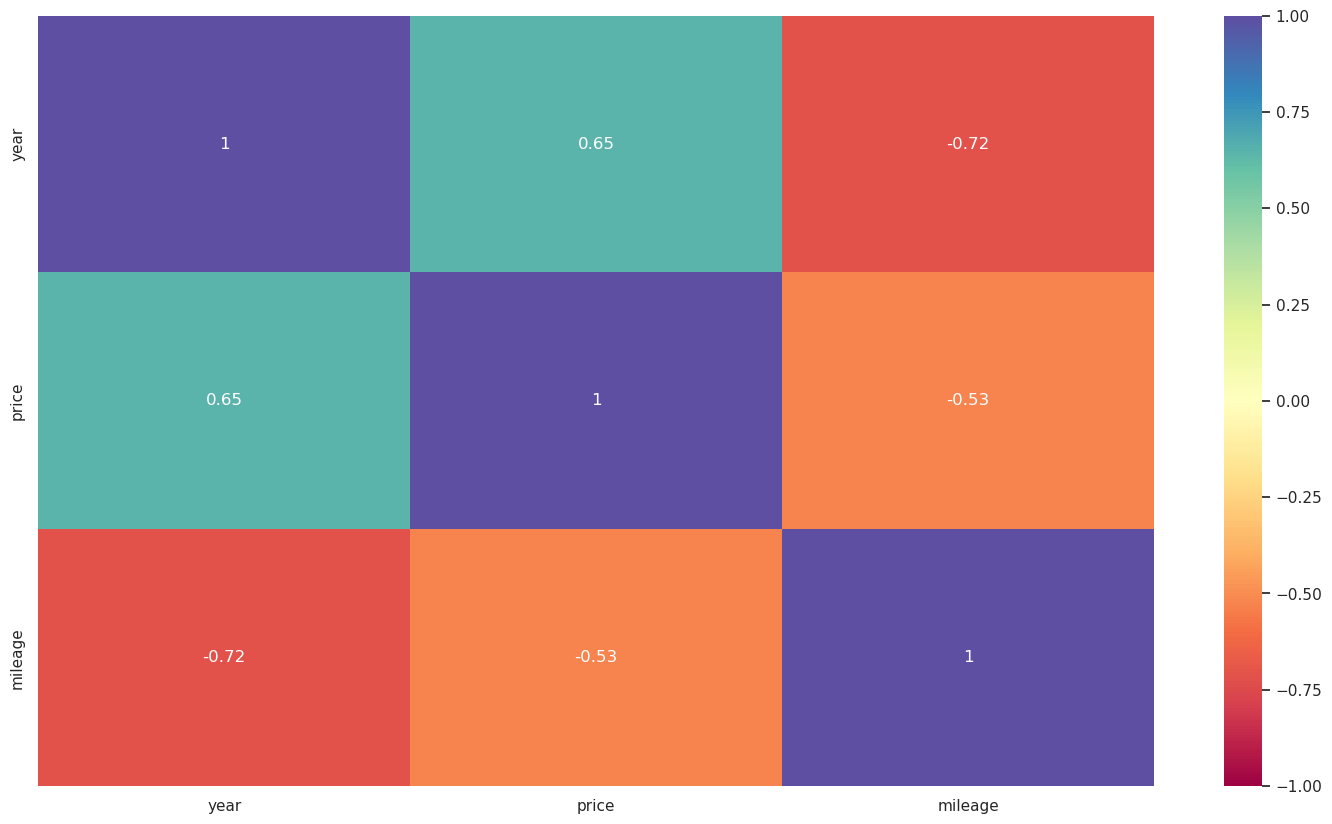

In [4]:
sn.set(rc = {'figure.figsize' : (18,10)})
sn.heatmap(df.corr(),annot = True, fmt = '.2g', cmap = 'Spectral',vmin = -1,vmax=1)
plt.show()

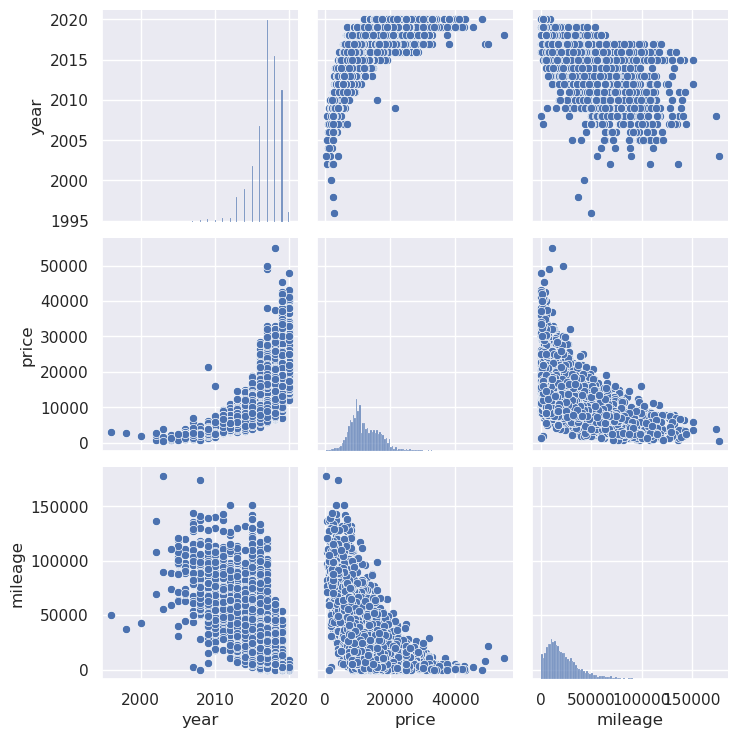

In [5]:
pair = sn.pairplot(df)
plt.show()

In [6]:
X = df.drop('price', axis = 1)
y = df['price']

X_train, X_rest, y_train, y_rest = train_test_split(X,y,test_size=0.7)
X_val, X_test, y_val, y_test = train_test_split(X_rest,y_rest,test_size=0.2)

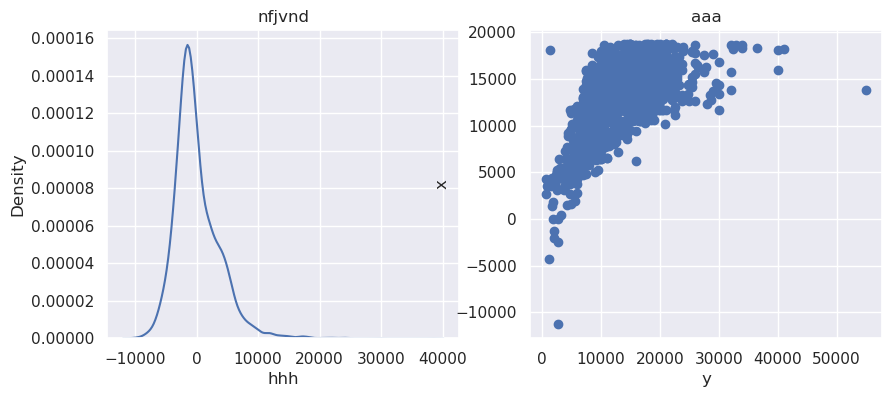

,poly degree,linear_train_errors,linear_val_errors,linear_test_errors
0,1,1.285673e+07,1.288341e+07,1.311522e+07
1,2,1.200908e+07,1.201622e+07,1.216812e+07
2,3,1.194243e+07,1.195918e+07,1.214267e+07
3,4,1.184149e+07,1.187440e+07,1.205347e+07
4,5,1.179670e+07,1.185261e+07,1.208828e+07
5,6,1.328888e+07,1.349782e+07,1.364013e+07


In [7]:
## define a list of values for the maximum polynomial degree 
degrees = [1,2,3,4,5,6]    

# we will use this variables to store the resulting training and validation errors for each polynomial degree
linear_tr_errors = []          
linear_val_errors = []
linear_test_errors = []
for degree in degrees:    # use for-loop to fit polynomial regression models with different degrees
    lin_regr = LinearRegression(fit_intercept=False) # NOTE: "fit_intercept=False" as we already have a constant iterm in the new feature X_poly
    poly = PolynomialFeatures(degree=degree)    # generate polynomial features
    X_train_poly = poly.fit_transform(X_train)    # fit the raw features
    lin_regr.fit(X_train_poly, y_train)    # apply linear regression to these new features and labels
  
    y_pred_train = lin_regr.predict(X_train_poly)    # predict using the linear model
    tr_error = mean_squared_error(y_train, y_pred_train)    # calculate the training error
    X_val_poly = poly.transform(X_val) # transform the raw features for the validation data 
    y_pred_val = lin_regr.predict(X_val_poly) # predict values for the validation data using the linear model 
    val_error = mean_squared_error(y_val, y_pred_val) # calculate the validation error
    X_test_poly = poly.transform(X_test)
    y_pred_test = lin_regr.predict(X_test_poly)
    test_error = mean_squared_error(y_test, y_pred_test)
 
    linear_tr_errors.append(tr_error)
    linear_val_errors.append(val_error)
    linear_test_errors.append(test_error)
fig, ax = plt.subplots(1,2,figsize = (10,4))
ax[0].set_title('nfjvnd')
sn.distplot((y_train-y_pred_train),hist = False,ax=ax[0])
ax[0].set_xlabel('hhh')

ax[1].set_title('aaa')
ax[1].scatter(x=y_test, y= y_pred_test)
ax[1].set_xlabel('y')
ax[1].set_ylabel('x')
plt.show()
    
    
errors = {"poly degree":degrees,
          "linear_train_errors":linear_tr_errors,
          "linear_val_errors":linear_val_errors,
          "linear_test_errors":linear_test_errors,
         }
pd.DataFrame({ key:pd.Series(value) for key, value in errors.items()})

In [8]:
num_layers = [1,2,4,6,8,10]    # number of hidden layers
num_neurons = 15  # number of neurons in each layer
mlp_tr_errors = []          
mlp_val_errors = []

for i, num in enumerate(num_layers):
    hidden_layer_sizes = tuple([num_neurons]*num) # size (num of neurons) of each layer stacked in a tuple
    
    # mlp_regr = ... # Initialise an MLPRegressor
 
    # mlp_regr.fit(...,...)    # Train MLP on the training set
    
    # YOUR CODE HERE
    mlp_regr = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes, max_iter = 1000, random_state = 42)
    mlp_regr.fit(X_train,y_train)
    ## evaluate the trained MLP on both training set and validation set
    y_pred_train = mlp_regr.predict(X_train)    # predict on the training set
    tr_error = mean_squared_error(y_train, y_pred_train)    # calculate the training error
    y_pred_val = mlp_regr.predict(X_val) # predict values for the validation data 
    val_error = mean_squared_error(y_val, y_pred_val) # calculate the validation error
    
    mlp_tr_errors.append(tr_error)
    mlp_val_errors.append(val_error)
    
_errors = {"num_hidden_layers":num_layers,
          "mlp_train_errors":mlp_tr_errors,
          "mlp_val_errors":mlp_val_errors,
         }
pd.DataFrame(_errors)

,num_hidden_layers,mlp_train_errors,mlp_val_errors
0,1,1.500188e+07,1.520192e+07
1,2,1.501799e+07,1.524081e+07
2,4,1.485499e+07,1.514460e+07
3,6,1.487071e+07,1.514385e+07
4,8,1.502965e+07,1.529868e+07
5,10,1.495471e+07,1.526478e+07
